This lesson is from Codecademy Linear Regression Module

### Introduction to Linear Regression
Linear regression is a powerful modeling technique that can be used to understand the relationship between a quantitative variable and one or more other variables, sometimes with the goal of making predictions. For example, linear regression can help us answer questions like:

- What is the relationship between apartment size and rental price for NYC apartments?
- Is a mother’s height a good predictor of their child’s adult height?

The first step before fitting a linear regression model is exploratory data analysis and data visualization: is there a relationship that we can model? 

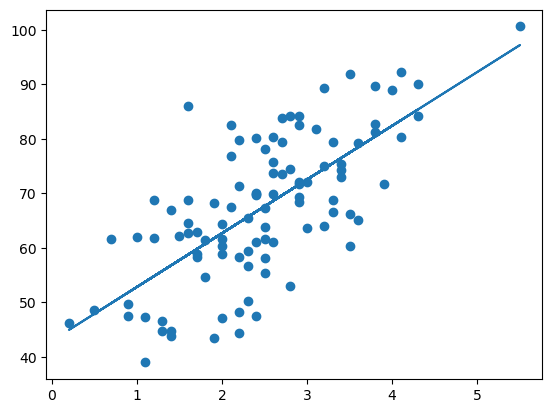

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
students = pd.read_csv('test_data.csv')

# Write equation for a line
y = 9.85 * students.hours_studied + 43

# Create the plot here:
plt.scatter(students.hours_studied, students.score)

plt.plot(students.hours_studied, y)
plt.show()

### Equation of a Line
Like the name implies, LINEar regression involves fitting a line to a set of data points. In order to fit a line, it’s helpful to understand the equation for a line, which is often written as y=mx+b. In this equation:

- x and y represent variables, such as height and weight or hours of studying and quiz scores.
- b represents the y-intercept of the line. This is where the line intersects with the y-axis (a vertical line located at x = 0).
- m represents the slope. This controls how steep the line is. If we choose any two points on a line, the slope is the ratio between the vertical and horizontal distance between those points; this is often written as rise/run.

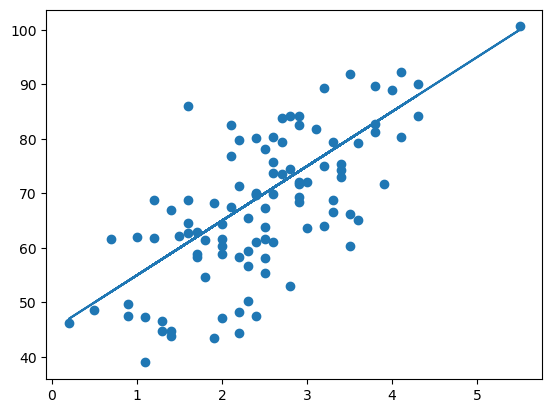

In [5]:
predicted_score = 10 * students.hours_studied + 45

# Create the plot. Does this plot fit the data well?
plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score)
plt.show()

### Finding the "Best" Line
In the last exercise, we tried to eye-ball what the best-fit line might look like. In order to actually choose a line, we need to come up with some criteria for what *best* actually means.

Depending on our ultimate goals and data, we might choose different criteria; however, a common choice for linear regression is ordinary least squares (OLS). In simple OLS regression, we assume that the relationship between two variables x and y can be modeled as: $y = mx + b + error$

We define *best* as the line that minimizes the total squared error for all data points. This total squared error is called the loss function in machine learning. 

### Fitting a Linear Regression Model in Python
There are a number of Python libraries that can be used to fit a linear regression, but in this course, we will use the OLS.from_formula() function from statsmodels.api because it uses simple syntax and provides comprehensive model summaries.

In [4]:
import statsmodels.api as sm

# Create the model here:
model = sm.OLS.from_formula('score ~ hours_studied', data = students)

# Fit the model here:
results = model.fit()

# Print the coefficients here:
print(results.params)

# Calculate and print `pred_3hr` here:
pred_3hr = results.params[1] * 3 + results.params[0]
print(pred_3hr)

# Calculate and print `pred_5hr` here:
num = {'hours_studied': [5]}
pred_5hr = results.predict(num)
print(pred_5hr)

# Interpretation of the intercept:

# A student who studied for 0 hours will have a score of 43 on the test.

# Interpretation of the slope:
# For every additional 1 hour of studying, students are expected to score 9.8 points higher on the test. 



Intercept        43.016014
hours_studied     9.848111
dtype: float64
72.56034698735527
0    92.256569
dtype: float64


### Assumptions of Linear Regression Part 1
There are a number of assumptions of simple linear regression, which are important to check if you are fitting a linear model. The first assumption is that the relationship between the outcome variable and predictor is linear (can be described by a line). We can check this before fitting the regression by simply looking at a plot of the two variables.

The next two assumptions (normality and homoscedasticity) are easier to check after fitting the regression. We will learn more about these assumptions in the following exercises, but first, we need to calculate two things: fitted values and residuals.

Again consider our regression model to predict weight based on height (model formula 'weight ~ height'). The fitted values are the predicted weights for each person in the dataset that was used to fit the model, while the residuals are the differences between the predicted weight and the true weight for each person. 

The residuals are the differences between each of these fitted values and the true values of the outcome variable.

In [6]:
# Calculate `fitted_values` here:
fitted_values = results.predict(students)
# print(fitted_values)

# Calculate `residuals` here:

residuals = students.score - fitted_values

# Print the first 5 residuals here:
print(residuals[:5])

0     3.894086
1     8.806731
2   -12.236291
3     5.827009
4    10.096631
dtype: float64


### Assumptions of Linear Regression Part 2
Once we’ve calculated the fitted values and residuals for a model, we can check the normality and homoscedasticity assumptions of linear regression.

##### Normality assumption
The normality assumption states that the residuals should be normally distributed. To check this assumption, we can inspect a histogram of the residuals and make sure that the distribution looks approximately normal (no skew or multiple “humps”):

![normality1](normality1.jpg)

These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.

If the plot instead looked something like the distribution below (which is skewed right), we would be concerned that the normality assumption is not met:

![rightSkewed](rightSkewed.jpg)


##### Homoscedasticity assumption
Homoscedasticity is a fancy way of saying that the residuals have equal variation across all values of the predictor variable. A common way to check this is by plotting the residuals against the fitted values.

![homoscedasticity1](homoscedasticity1.jpg)

If the homoscedasticity assumption is met, then this plot will look like a random splatter of points, centered around y=0 (as in the example above).

If there are any patterns or asymmetry, that would indicate the assumption is NOT met and linear regression may not be appropriate. For example:

![homoscedasticity2](homoscedasticity2.png)




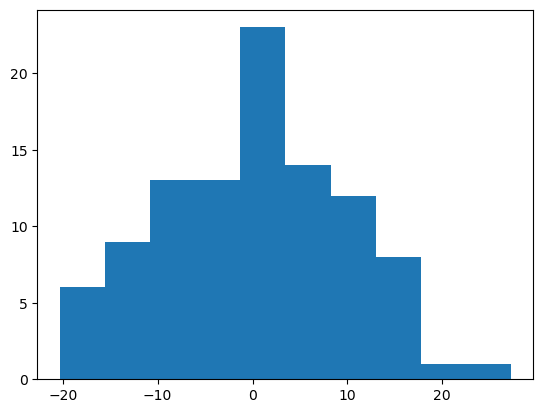

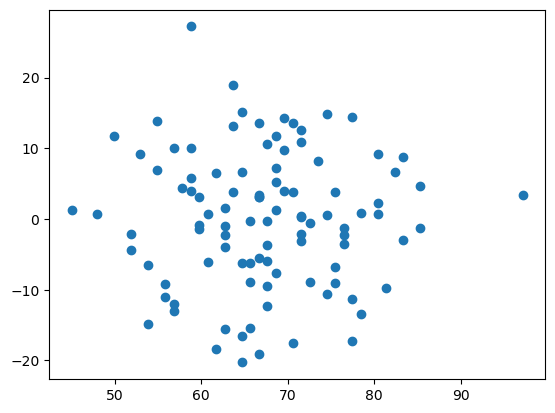

In [7]:
# Plot a histogram of the residuals here:
plt.hist(residuals)
plt.show()
plt.clf()

# Plot the residuals against the fitted vals here:
plt.scatter(fitted_values, residuals)
plt.show()

### Categorical Predictors
In the previous exercises, we used a quantitative predictor in our linear regression, but it’s important to note that we can also use categorical predictors. The simplest case of a categorical predictor is a binary variable (only two categories).

breakfast
0    61.664151
1    73.721277
Name: score, dtype: float64


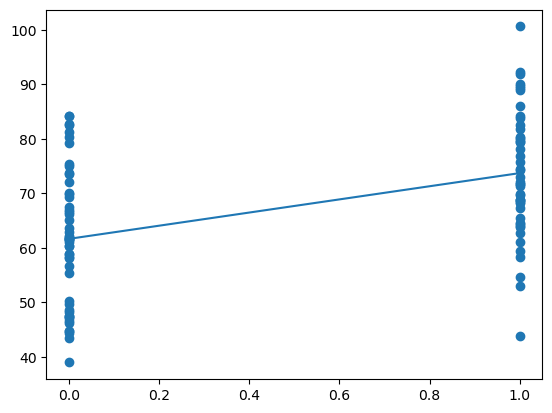

In [8]:
# Calculate group means
print(students.groupby('breakfast').mean().score)

# Create the scatter plot here:
plt.scatter(students.breakfast, students.score)

# Add the additional line here:
plt.plot([0, 1], [61.66415094339621, 73.7212765957447])

# Show the plot
plt.show()

In [9]:
# Calculate and print group means
mean_score_no_breakfast = np.mean(students.score[students.breakfast == 0])
mean_score_breakfast = np.mean(students.score[students.breakfast == 1])
print('Mean score (no breakfast): ', mean_score_no_breakfast)
print('Mean score (breakfast): ', mean_score_breakfast)

# Fit the model and print the coefficients
# Create the model here:
model = sm.OLS.from_formula('score ~ breakfast', data = students)

# Fit the model here:
results = model.fit()

# Print the coefficients here:
print(results.params)
# Calculate and print the difference in group means
print(mean_score_breakfast - mean_score_no_breakfast)

Mean score (no breakfast):  61.664150943396216
Mean score (breakfast):  73.72127659574468
Intercept    61.664151
breakfast    12.057126
dtype: float64
12.057125652348468


#### Website data

Model 1
Intercept    128.967945
age            6.913758
dtype: float64


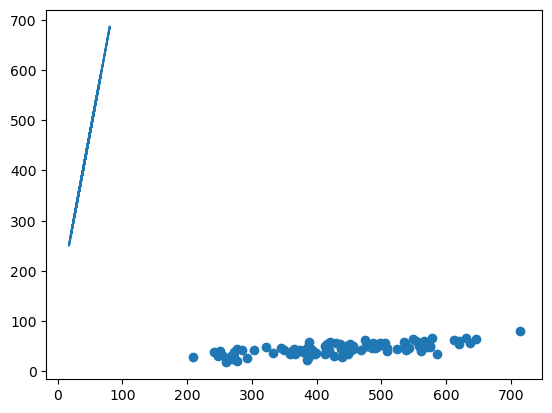

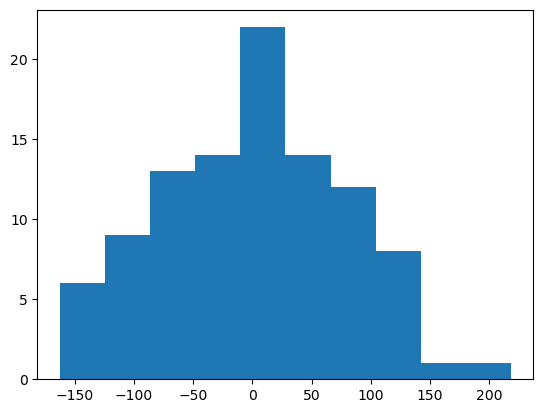

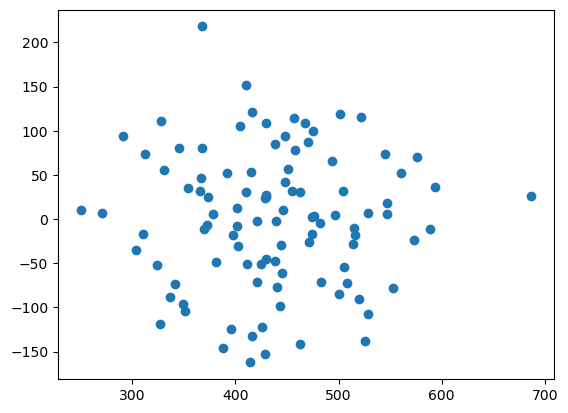


0    405.518249
dtype: float64

Model 2
Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64

Mean score (Safari): 390.64716981132074
Mean score (Chrome): 489.70425531914884


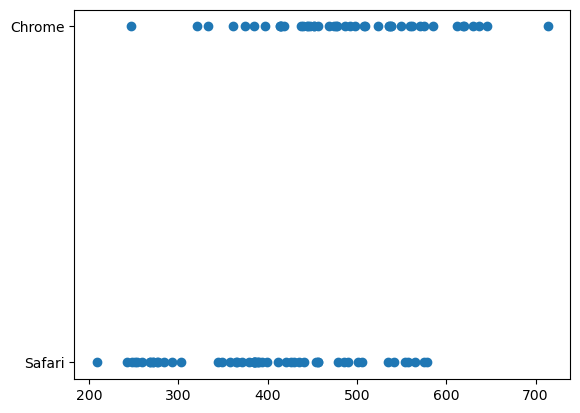

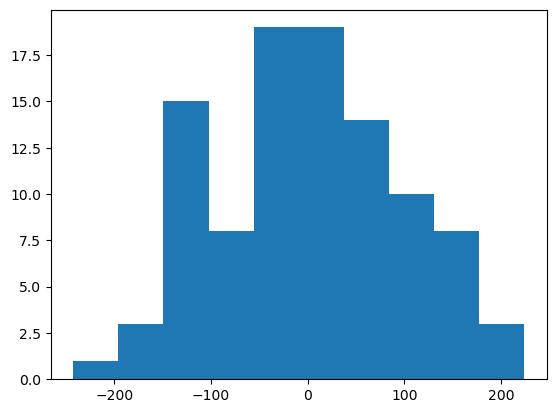

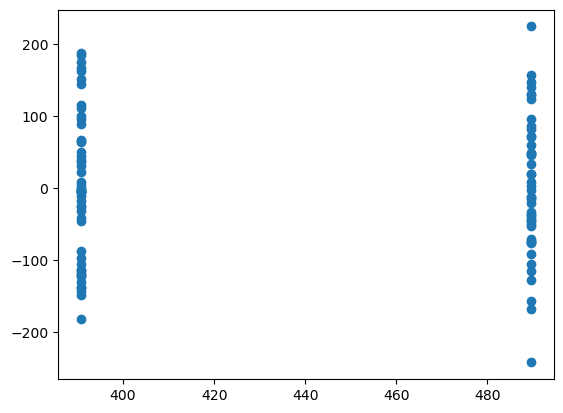

<Figure size 640x480 with 0 Axes>

In [23]:
# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
# print(website.head())

# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', data = website)

results = model.fit()
print('Model 1')
print(results.params)
# Plot the scatter plot with the line on top
plt.scatter(website.time_seconds, website.age)
plt.plot(website.age, results.predict(website))
# Show then clear plot
plt.show()
plt.clf()

# Calculate fitted values
fitted_values = results.predict(website)
# print()
# print(fitted_values[:5])

# Calculate residuals
residuals = website.time_seconds - fitted_values

# Print the first 5 residuals here:
# print()
# print(residuals[:5])

# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Predict amount of time on website for 40 year old
time = {'age':[40]}
time_spent = results.predict(time)
print()
print(time_spent)

# Fit a linear regression to predict time_seconds based on the browser
model1 = sm.OLS.from_formula('time_seconds ~ browser', data = website)

results1 = model1.fit()

print()
print('Model 2')
print(results1.params)

# Calculate and print the group means (for comparison)
mean_score_Safari = np.mean(website.time_seconds[website.browser == 'Safari'])
mean_score_Chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])

print()
print(f'Mean score (Safari): {mean_score_Safari}')
print(f'Mean score (Chrome): {mean_score_Chrome}')

plt.scatter(website.time_seconds, website.browser)
# Show then clear plot
plt.show()
plt.clf()

# Calculate fitted values
fitted_values1 = results1.predict(website)
# print()
# print(fitted_values[:5])

# Calculate residuals
residuals1 = website.time_seconds - fitted_values1

# Print the first 5 residuals here:
# print()
# print(residuals[:5])

# Check normality assumption
plt.hist(residuals1)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values1, residuals1)
# Show then clear the plot
plt.show()
plt.clf()

### Linear Regression with a Categorical Predictor
Learn how to fit and interpret a linear model with a categorical predictor that has more than two categories.